In [1]:
import pandas as pd
from scipy.stats import chi2_contingency
import scipy.stats as stats
import matplotlib.pyplot as plt
from termcolor import colored
import seaborn as sns

# Import des données

In [2]:
data = pd.read_csv('../data/application_train_vf.csv')

In [3]:
features = ['TARGET', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE']

In [4]:
data = data[features]

# Data Visualisation

In [5]:
nums = data.select_dtypes(exclude = 'object').columns.to_list()
cats = data.select_dtypes(include = 'object').columns.to_list()

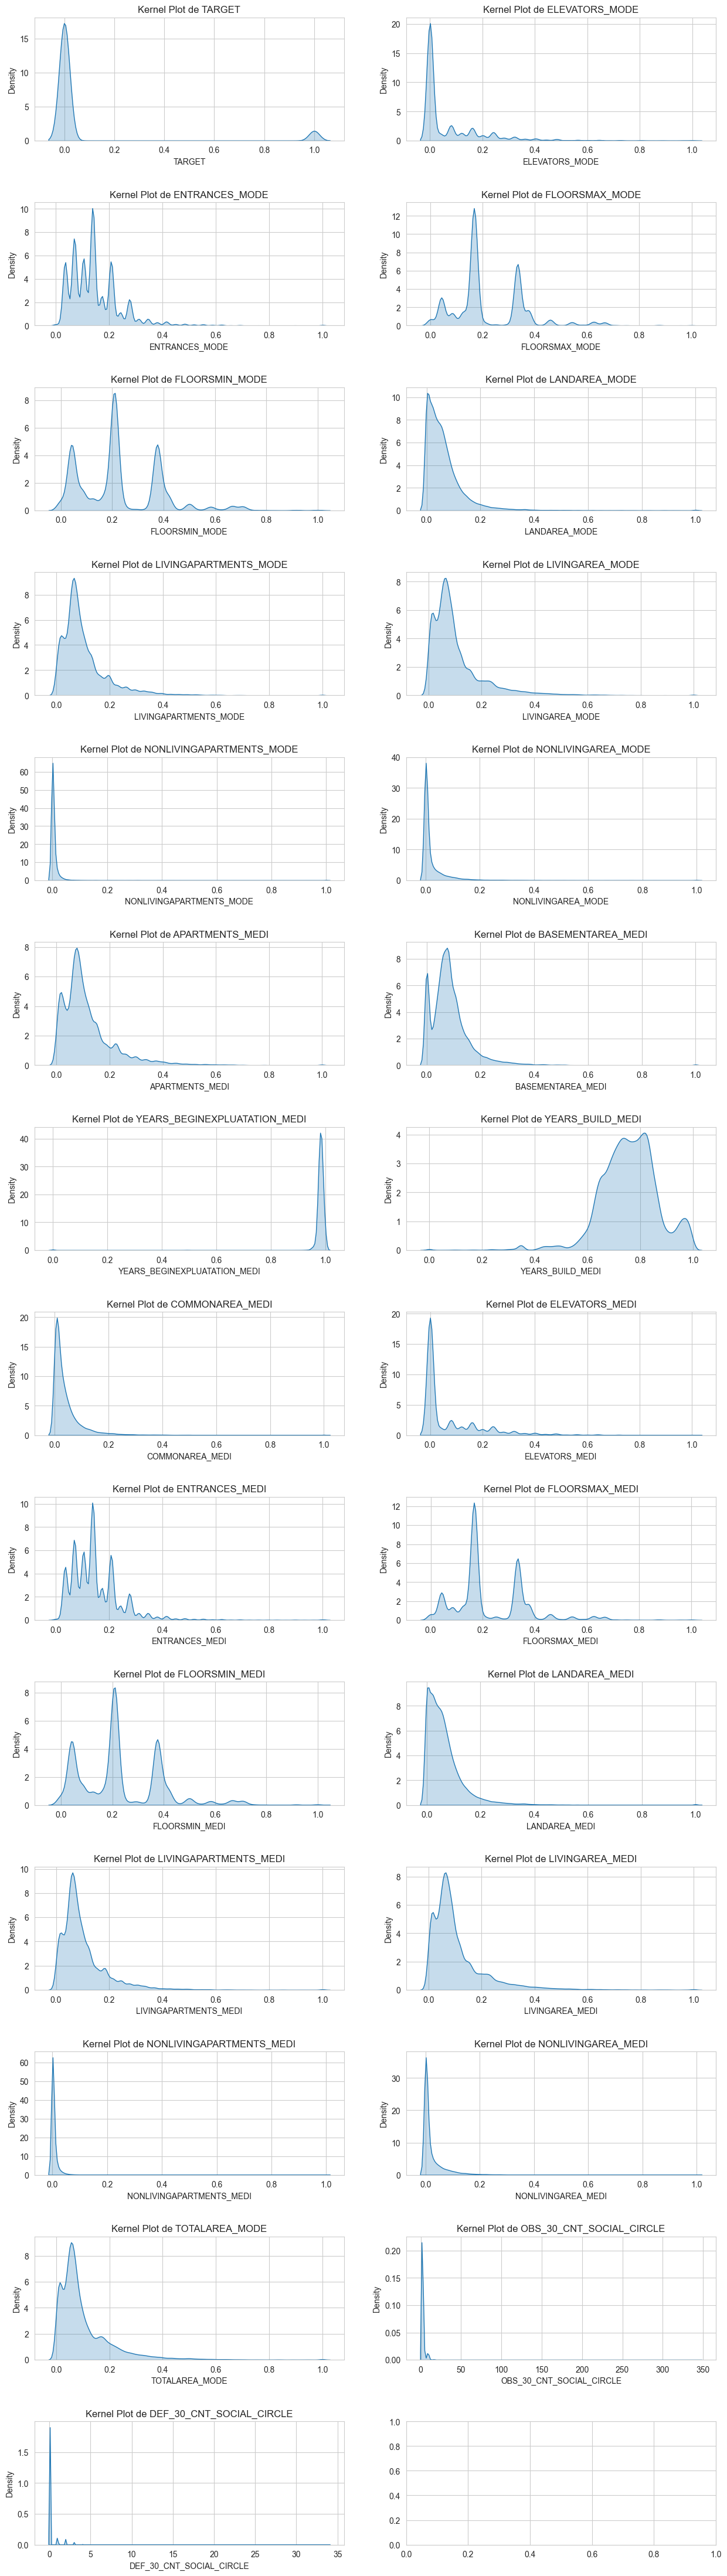

In [6]:
num_cols = 2
num_rows = (len(nums) + 1) // 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

fig.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, col in enumerate(nums):
    sns.kdeplot(x=data[col], ax=axes[i], fill=True)
    axes[i].set_title(f'Kernel Plot de {col}')

plt.show()

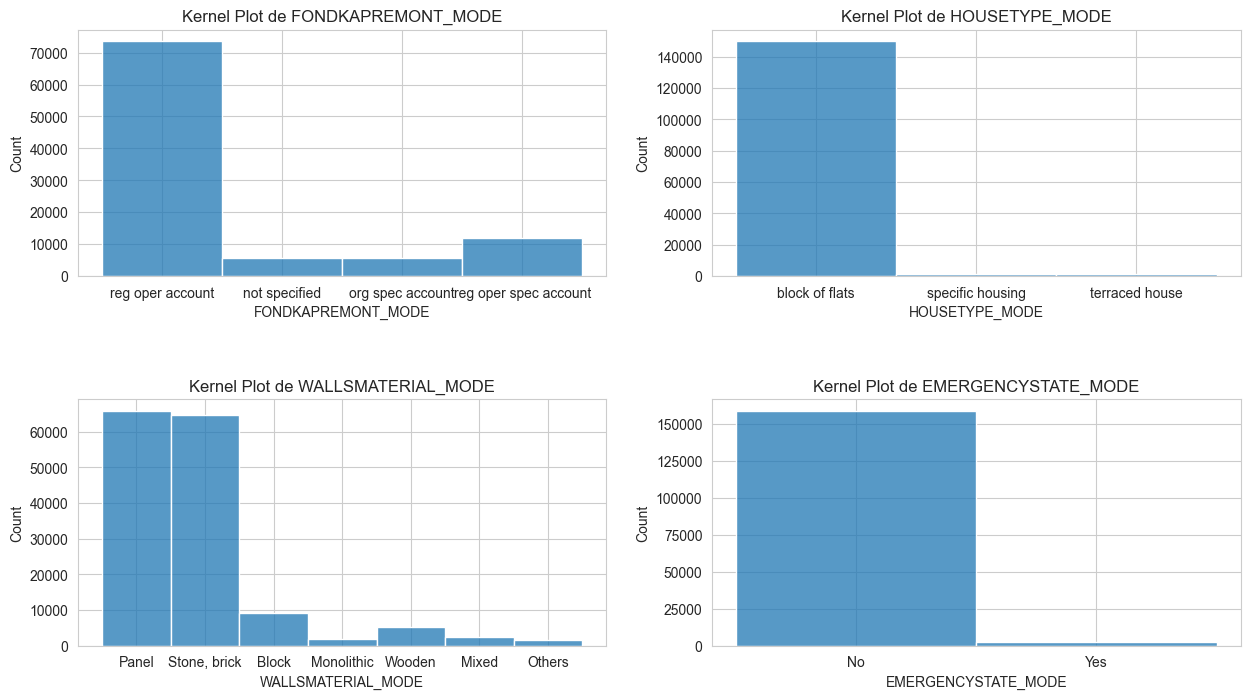

In [7]:
num_cols = 2
num_rows = (len(cats) + 1) // 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

fig.subplots_adjust(hspace=0.5)

axes = axes.flatten()

for i, col in enumerate(cats):
    sns.histplot(x=data[col], ax=axes[i], fill=True)
    axes[i].set_title(f'Kernel Plot de {col}')

plt.show()

# Traitement des valeurs manquantes

In [14]:
print(data.isna().sum().sum())

4919173


In [15]:
for col in nums:
    data[col].fillna(data[col].mean(), inplace=True)

for col in cats:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [16]:
print(data.isna().sum().sum())

0


## Sélection des variables par test statistiques

In [17]:
var_cat_dependantes = []

for column in cats :
    if column != 'TARGET':  
        contingency_table = pd.crosstab(data['TARGET'], data[column])
        _, p_value, _, _ = chi2_contingency(contingency_table)
        
        if p_value > 0.1 :
            print(colored(f"On conserve H0, {column} et TARGET sont indépendantes : p-value = {p_value}", 'red'))
        if p_value < 0.1 :
            print(colored(f"On rejette H0, {column} et TARGET ne sont pas indépendantes : p-value = {p_value}", 'green'))
            var_cat_dependantes.append(column)

On rejette H0, FONDKAPREMONT_MODE et TARGET ne sont pas indépendantes : p-value = 2.539783160905626e-17
On rejette H0, HOUSETYPE_MODE et TARGET ne sont pas indépendantes : p-value = 0.025247533573079645
On rejette H0, WALLSMATERIAL_MODE et TARGET ne sont pas indépendantes : p-value = 1.230312034747884e-21
On rejette H0, EMERGENCYSTATE_MODE et TARGET ne sont pas indépendantes : p-value = 0.012382956657717364


In [19]:
var_num_dependantes = []
for column in nums:
    if column != 'TARGET':
        groupe_0 = [data[column][i] for i in range(len(data['TARGET'])) if data['TARGET'][i] == 0]
        groupe_1 = [data[column][i] for i in range(len(data['TARGET'])) if data['TARGET'][i] == 1]
        
        statistique_U, p_value = stats.mannwhitneyu(groupe_0, groupe_1)
        
        if p_value > 0.1 :
            print(colored(f"On conserve H0, {column} et TARGET sont indépendantes : p-value = {p_value}", 'red'))
        if p_value < 0.1 :
            print(colored(f"On rejette H0, {column} et TARGET ne sont pas indépendantes : p-value = {p_value}", 'green'))
            var_num_dependantes.append(column)

On rejette H0, ELEVATORS_MODE et TARGET ne sont pas indépendantes : p-value = 3.1586278387670845e-08
On conserve H0, ENTRANCES_MODE et TARGET sont indépendantes : p-value = 0.8695718809860472
On rejette H0, FLOORSMAX_MODE et TARGET ne sont pas indépendantes : p-value = 1.968999298694738e-15
On rejette H0, FLOORSMIN_MODE et TARGET ne sont pas indépendantes : p-value = 0.0026224795800405083
On conserve H0, LANDAREA_MODE et TARGET sont indépendantes : p-value = 0.9283017039235443
On conserve H0, LIVINGAPARTMENTS_MODE et TARGET sont indépendantes : p-value = 0.24035986090737949
On rejette H0, LIVINGAREA_MODE et TARGET ne sont pas indépendantes : p-value = 5.385077222755906e-05
On rejette H0, NONLIVINGAPARTMENTS_MODE et TARGET ne sont pas indépendantes : p-value = 2.1422329951220525e-18
On rejette H0, NONLIVINGAREA_MODE et TARGET ne sont pas indépendantes : p-value = 3.482935572420691e-14
On rejette H0, APARTMENTS_MEDI et TARGET ne sont pas indépendantes : p-value = 0.000419830451501643
On 

In [20]:
var_dependantes = var_cat_dependantes.copy()

In [21]:
var_dependantes.extend(var_num_dependantes)

In [23]:
len(var_dependantes)

24

# Études des variables catégorielles

In [24]:
var_cat_dependantes 

['FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

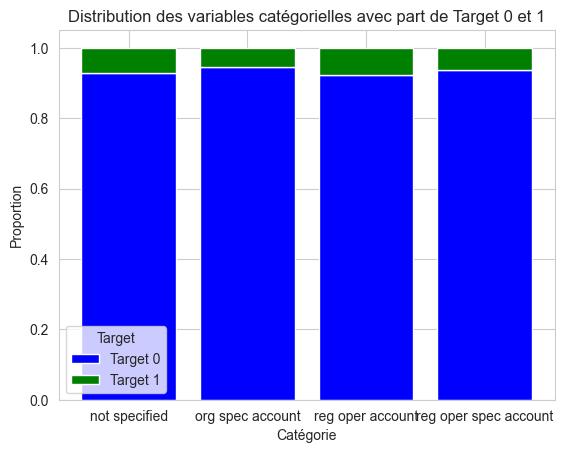

In [28]:
grouped = data.groupby('FONDKAPREMONT_MODE')['TARGET'].value_counts(normalize=True).unstack()

# Préparation des données pour le graphique
categories = grouped.index
target_0 = grouped[0]
target_1 = grouped[1]

# Créer un graphique à barres
plt.bar(categories, target_0, color='blue', label='Target 0')
plt.bar(categories, target_1, bottom=target_0, color='green', label='Target 1')

# Ajouter des titres et des étiquettes
plt.title('Distribution des variables catégorielles avec part de Target 0 et 1')
plt.xlabel('Catégorie')
plt.ylabel('Proportion')
plt.legend(title='Target')

# Afficher le graphique
plt.show()

In [27]:
pd.crosstab(data["TARGET"], data["FONDKAPREMONT_MODE"])

FONDKAPREMONT_MODE,not specified,org spec account,reg oper account,reg oper spec account
TARGET,,,,
0,5256,5291,260791,11286
1,411,307,22017,748
